In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [37]:
fire_data_path = '../data/intermediate/fire_distance_data.csv'
fire_df = pd.read_csv(fire_data_path)
fire_df.head()

,Fire_Year,Fire_Name,GIS_Acres,Fire_Type,Distance
0,1964,COYOTE (4),65338.877636,Wildfire,597.497529
1,1964,C. HANLY (5),55960.694158,Wildfire,584.111579
2,1964,COZY DELL (5),19218.105903,Wildfire,531.527354
3,1964,HAYFORK HWY. #2 (5),18712.494746,Wildfire,574.839178
4,1964,MATTOLE (5),16887.001024,Wildfire,645.542020


In [33]:
nearby_fire_path = '../data/intermediate/nearby_fires.csv'
nearby_fire_df = pd.read_csv(nearby_fire_path)
nearby_fire_df.head()

,Fire_Year,Fire_Name,GIS_Acres,Fire_Type,Distance
0,1964,COYOTE (4),65338.877636,Wildfire,597.497529
1,1964,C. HANLY (5),55960.694158,Wildfire,584.111579
2,1964,COZY DELL (5),19218.105903,Wildfire,531.527354
3,1964,HAYFORK HWY. #2 (5),18712.494746,Wildfire,574.839178
4,1964,MATTOLE (5),16887.001024,Wildfire,645.542020


In [35]:
smoke_data_path = '../data/intermediate/cumulative_smoke.csv'
smoke_df = pd.read_csv(smoke_data_path)
smoke_df.head() 

,year,cumulative_smoke
0,1964,1075.820025
1,1965,710.245794
2,1966,2615.136579
3,1967,1455.560877
4,1968,970.818183


In [30]:
gas_data_path = '../data/intermediate/gas_df_filtered.csv'
gas_df = pd.read_csv(gas_data_path)
gas_df.head()

,state_code,county_code,site_number,parameter,date_local,arithmetic_mean,aqi,year
0,49,35,3001,Carbon monoxide,1970-05-13,5.745833,82.0,1970
1,49,35,3001,Carbon monoxide,1970-05-11,7.190000,91.0,1970
2,49,35,3001,Carbon monoxide,1970-05-12,6.245833,86.0,1970
3,49,35,3001,Carbon monoxide,1970-05-14,3.637500,60.0,1970
4,49,35,3001,Carbon monoxide,1970-05-15,6.238889,90.0,1970


In [34]:
part_data_path = '../data/intermediate/part_df_filtered.csv'
part_df = pd.read_csv(part_data_path)
part_df.head()

,state_code,county_code,site_number,parameter,date_local,arithmetic_mean,aqi,year
0,49,35,12,PM10 Total 0-10um STP,1985-10-08,25.0,23.0,1985
1,49,35,12,PM10 Total 0-10um STP,1985-10-10,48.0,44.0,1985
2,49,35,12,PM10 Total 0-10um STP,1985-10-12,19.0,18.0,1985
3,49,35,12,PM10 Total 0-10um STP,1985-10-14,33.0,31.0,1985
4,49,35,12,PM10 Total 0-10um STP,1985-10-18,67.0,57.0,1985


## Visualizations

1. Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city for all fires ranging up to 1800 miles away from your assigned city. Your histogram should indicate the distance cut-off for your modeling work as specified in Step 1.

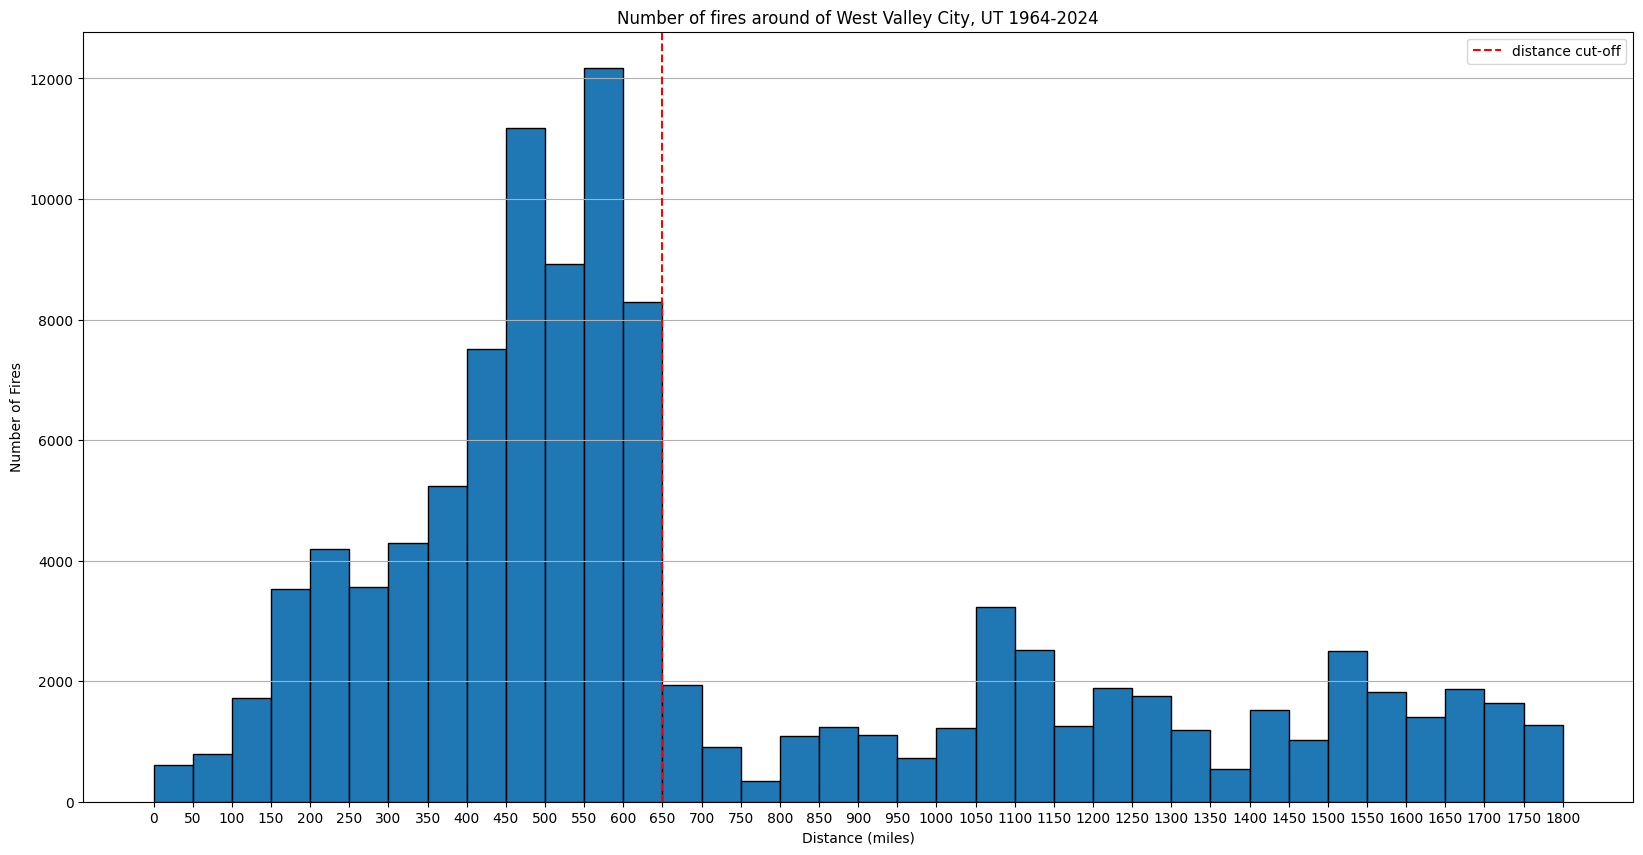

In [68]:
start_year = 1964
end_year = 2024
bin_width = 50
distance_range = 1800

# Fitler data
filtered_fire_df = fire_df[(fire_df['Fire_Year'] >= start_year) & (fire_df['Fire_Year'] <= end_year)]
filtered_fire_df = filtered_fire_df[filtered_fire_df['Distance'] <= distance_range]

_ = plt.figure(figsize=(20, 10))

bins = range(0, distance_range+1, bin_width)
_ = plt.hist(filtered_fire_df['Distance'], bins=bins, edgecolor='black')
_ = plt.title(f'Number of fires around of West Valley City, UT {start_year}-{end_year}')
_ = plt.xlabel('Distance (miles)')
_ = plt.ylabel('Number of Fires')
_ = plt.axvline(x=650, color='r', linestyle='--', label='distance cut-off')
_ = plt.legend()
_ = plt.xticks(bins)
plt.grid(axis='y')
plt.show()

2. Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

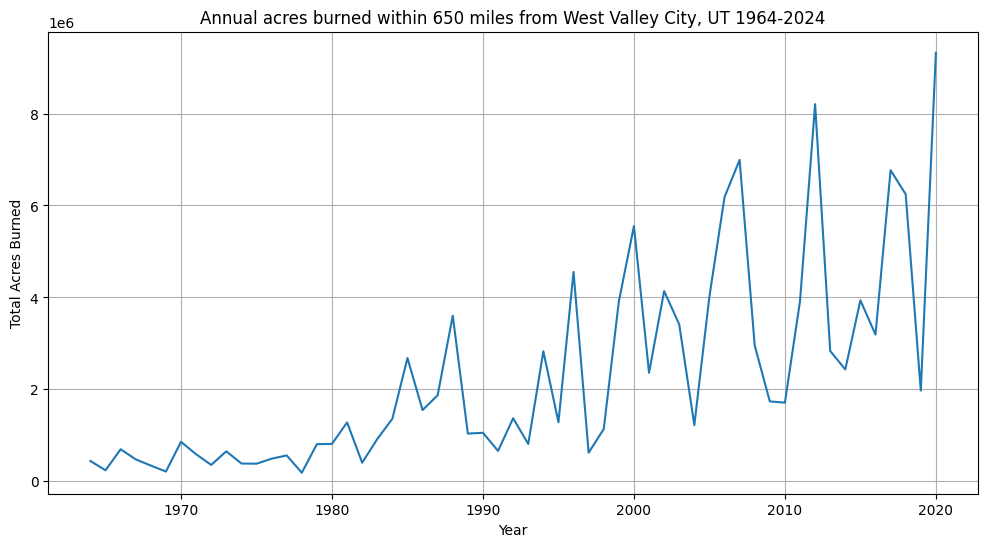

In [62]:
# Filter data
filter_nearby_fire_df = nearby_fire_df[(nearby_fire_df['Fire_Year'] >= start_year) & (nearby_fire_df['Fire_Year'] <= end_year)]
# Get annual acres burned for each year
annual_acres = filter_nearby_fire_df.groupby('Fire_Year')['GIS_Acres'].sum()

plt.figure(figsize=(12, 6))
plt.plot(annual_acres.index, annual_acres.values)
plt.title(f"Annual acres burned within 650 miles from West Valley City, UT {start_year}-{end_year}")
plt.xlabel("Year")
plt.ylabel("Total Acres Burned")
plt.grid(True)
plt.show()

3. Produce a time series graph containing your fire smoke estimates for your city and the AQI estimates for your city.

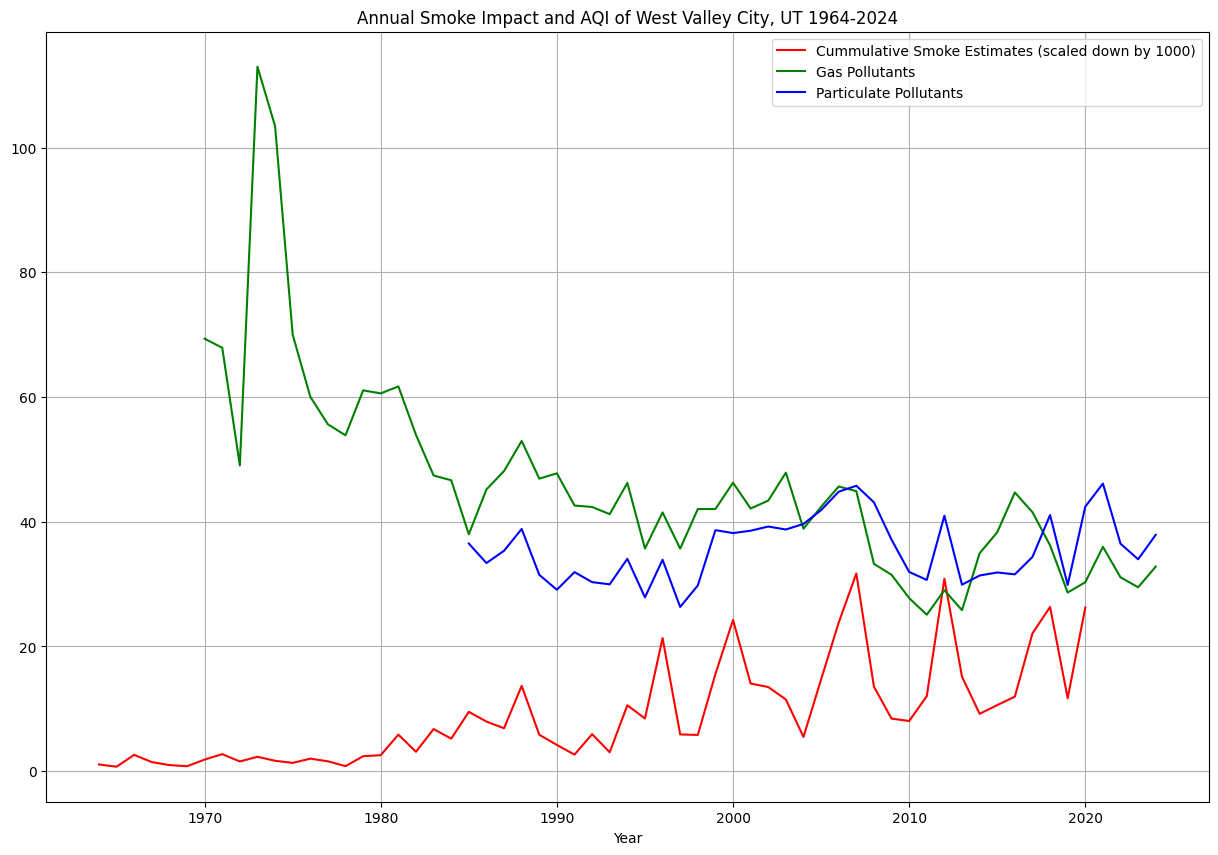

In [81]:
# Group gas data by year and calculate the mean AQI
gas_yearly = gas_df.groupby('year')['aqi'].mean()
part_yearly = part_df.groupby('year')['aqi'].mean()
# Scale the fire year by dividing by 1000
smoke_df['smoke_thousands'] = smoke_df['cumulative_smoke'] / 1000

plt.figure(figsize=(15, 10))
plt.plot(smoke_df['year'], smoke_df['smoke_thousands'], color='r', label="Cummulative Smoke Estimates (scaled down by 1000)")
plt.plot(gas_yearly.index, gas_yearly.values, color='g', label="Gas Pollutants")
plt.plot(part_yearly.index, part_yearly.values, color='b', label="Particulate Pollutants")
plt.title(f"Annual Smoke Impact and AQI of West Valley City, UT {start_year}-{end_year}")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()